In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from node import Node
from graph import DiGraph
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from vco import VCO
from amplifier import Amplifier
from voltage import Voltage   
from mixer import Mixer
from rack import Rack

In [34]:
rack = Rack()
fs = 48000 # Hz

voltage_0 = Voltage(value = 10)
voltage_1 = Voltage(value = 1000)
vco_0 = VCO(frequency = voltage_0, fs = fs)
amp_0 = Amplifier(value = vco_0, gain = voltage_1)
vco_1 = VCO(frequency = amp_0, fs = fs)
mixer_0 = Mixer(inputs = [vco_0, vco_1])
amp_1 = Amplifier(value = mixer_0, gain = voltage_1)
vco_2 = VCO(frequency = amp_1, fs = fs)

modules = [voltage_0, voltage_1, vco_0, amp_0, vco_1, mixer_0, amp_1, vco_2]
for module in modules:
    rack.add_object(module)

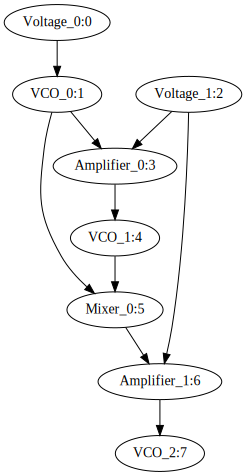

In [35]:
rack.plot()

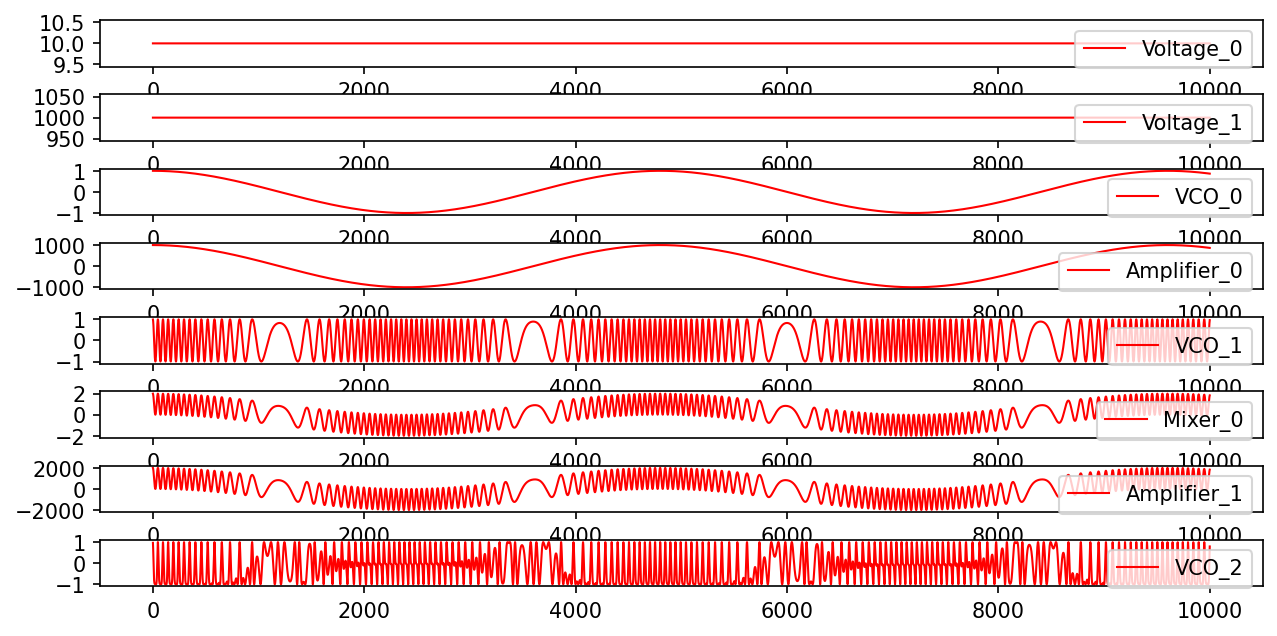

In [36]:
n_ite = 10000
probe = {k:np.zeros(n_ite) for k in rack.objects.keys()}

for iteration in range(n_ite):
    rack.step()
    for object_name in rack.objects.keys():
        probe[object_name][iteration] = rack.objects[object_name].outputs[0]
        
plt.figure(figsize = (10, 5), dpi = 150)
for i, object_name in enumerate(rack.objects.keys()):
    plt.subplot(len(rack.objects.keys()), 1, i+1)
    plt.plot(probe[object_name], label = object_name, linewidth = 1, c = 'r')
    plt.legend(loc = 'upper right')
plt.subplots_adjust(hspace = 0.6)